In [1]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn import datasets
from sklearn.linear_model import LinearRegression

# Data Processing and Visualization

In [2]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True,as_frame=True)
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [3]:
diabetes_y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [4]:
# Assign variables
X = diabetes_X['bmi']
y = diabetes_y

Text(0, 0.5, 'Disease Progression')

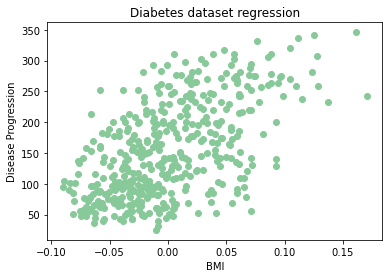

In [5]:
#Plot the dataset to visualize how to solve the problem
plt.scatter(X,y,color = '#88c999') #Scatter plot
plt.title('Diabetes dataset regression') #Set title
plt.xlabel('BMI') #Set x axis label
plt.ylabel('Disease Progression') #Set y axis label

# OLS (Ordinary Least Squares) Solution

In [6]:
X_mean = X.mean() # Mean of X
y_mean = y.mean() # Mean of Y
Sxx = np.sum((X - X_mean)**2) #Sum of Squares of X
Sxy = np.sum((X - X_mean)*(y-y_mean)) # Sum of Squares of Products of X and Y
Syy = np.sum((y-y_mean)**2) #Sum of Squares of Y

# The solution in the OLS case is: $$\hat{\alpha} = \frac{S_{xy}}{S_{xx}}$$  $$\hat{\beta} = \bar{y} - \hat{\alpha}\bar{x}$$


In [7]:
alpha = Sxy/Sxx #alpha calculation
alpha

949.435260383949

In [8]:
beta = y_mean - alpha*X_mean #beta calculation
beta

152.1334841628967

In [9]:
#Function for prediction
def predict(alpha,beta,X):
    return alpha*X + beta

#Utility function for printing predictions
def print_predictions(prog,prog_pred):
    df_pred = pd.DataFrame({'Progression_measured':prog,'Progression_predicted':prog_pred,'Error':prog-prog_pred})
    return df_pred

#Utility function for plotting
def plot_predictions(prog,prog_pred):
    plt.scatter(prog,prog_pred)
    plt.title('Progression predicted vs measured') #Set title
    plt.ylabel('Progression predicted') #Set y axis label
    plt.xlabel('Progression measured') #Set x axis label
    plt.axline((0, 0), slope=1, c = 'red',label='Perfect fit line') #Plot perfect fit line
    plt.legend() #Legends

In [10]:
y_pred_ols = [predict(alpha,beta,X_i) for X_i in X] #Predicted progression based on alpha and beta
df_ols = print_predictions(y,y_pred_ols)
df_ols.head()

,Progression_measured,Progression_predicted,Error
0,151.0,210.710038,-59.710038
1,75.0,103.262195,-28.262195
2,141.0,194.337033,-53.337033
3,206.0,141.124769,64.875231
4,135.0,117.588574,17.411426


AttributeError: module 'matplotlib.pyplot' has no attribute 'axline'

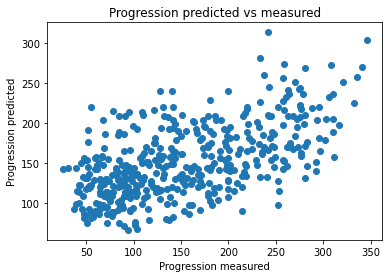

In [11]:
plot_predictions(y,y_pred_ols)

# Metrics for comparison:

# Coefficient of determination: $$R^2 = 1 - \frac{RSS}{TSS}$$

# Mean Average Error: $$MAE = \frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y_i})$$

# Mean Squared Error: $$MSE = \frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y_i})^2$$

# Root Mean Squared Error: $$RMSE = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y_i})^2}$$

In [12]:
#Utility function to calculate metrics
def print_metrics(y,y_pred):
    rss = np.sum((y-y_pred)**2) # Sum of Squares of Residuals 
    tss = np.sum((y-y.mean())**2) # Total Sum of Squares 
    r2 = 1 - (rss/tss) #Coefficient of Determination
    mae = np.sum((y-y_pred))/len(y) #Mean Average Error
    mse = np.sum((y-y_pred)**2)/len(y) # Mean Squared Error
    rmse = math.sqrt(mse) # Root Mean Squared Error
    print('The Coefficient of Determination is %s' % r2)
    print('The Mean Average Error is %s' % mae)
    print('The  Mean Squared Error is %s' % mse)
    print('The Root Mean Squared Error is %s' % rmse)
    return r2,mae,mse,rmse

In [13]:
r2_ols,mae_ols,mse_ols,rmse_ols = print_metrics(y,y_pred_ols)

The Coefficient of Determination is 0.3439237602253803
The Mean Average Error is -1.9033542966967388e-14
The  Mean Squared Error is 3890.4565854612724
The Root Mean Squared Error is 62.37352471570989


# Multiple Regression

$$Y = \beta_0X_0+ \beta_1X_1+ \beta_2X_2+ \beta_2X_3...$$
$$Y = X\beta$$

$$\beta = (X^{'}X)^{-1}X^{'}Y$$

In [15]:
X = diabetes_X.to_numpy()
y = diabetes_y.to_numpy()
X = np.concatenate([np.ones((X.shape[0],1)),X],axis=1)
beta = np.linalg.inv(X.T@X)@X.T@y #Multiple Regression Coefficients

In [16]:
y_pred_ols = X@beta #Predicted progression based on alpha and beta
df_ols = print_predictions(y,y_pred_ols)
df_ols.head()

,Progression_measured,Progression_predicted,Error
0,151.0,206.117070,-55.117070
1,75.0,68.072348,6.927652
2,141.0,176.884060,-35.884060
3,206.0,166.917966,39.082034
4,135.0,128.459842,6.540158


AttributeError: module 'matplotlib.pyplot' has no attribute 'axline'

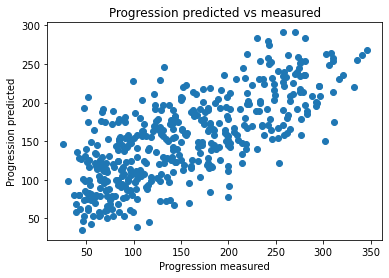

In [17]:
plot_predictions(y,y_pred_ols)

In [18]:
r2_ols,mae_ols,mse_ols,rmse_ols = print_metrics(y,y_pred_ols)

The Coefficient of Determination is 0.5177494254132934
The Mean Average Error is -2.9836364650921855e-14
The  Mean Squared Error is 2859.6903987680657
The Root Mean Squared Error is 53.47607314274362


# Linear Regression with scikit-learn:

In [32]:
#Define Features and Labels
X = diabetes_X.to_numpy()
y = diabetes_y.to_numpy()
model =LinearRegression(fit_intercept=True)

In [33]:
#Fit the model
model.fit(X,y)

LinearRegression()

In [34]:
#Get coefficient of determination
model.score(X,y)

0.5177494254132934

In [35]:
#Model coefficients
model.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [36]:
#Model Intercept
model.intercept_

152.1334841628965

In [37]:
#Get predictions given features
model.predict(X)

array([206.11706979,  68.07234761, 176.88406035, 166.91796559,
       128.45984241, 106.34908972,  73.89417947, 118.85378669,
       158.81033076, 213.58408893,  97.07853583,  95.1016223 ,
       115.06673301, 164.67605023, 103.07517946, 177.17236996,
       211.75953205, 182.84424343, 147.99987605, 124.01702527,
       120.33094632,  85.80377894, 113.11286302, 252.44934852,
       165.48821056, 147.72187623,  97.12824075, 179.09342974,
       129.05497324, 184.78138552, 158.71515746,  69.47588393,
       261.50255826, 112.81897436,  78.37194762,  87.66624129,
       207.92460213, 157.87686037, 240.84370686, 136.93372685,
       153.48187659,  74.15703284, 145.63105805,  77.8280105 ,
       221.0786645 , 125.22224022, 142.60147066, 109.4926324 ,
        73.14037106, 189.87368742, 157.93636782, 169.55816531,
       134.18186217, 157.72356219, 139.1077439 ,  72.73252701,
       207.8289973 ,  80.10834588, 104.08562488, 134.57807971,
       114.23779529, 180.67760064,  61.12644508,  98.72

# scikit-learn metrics

In [38]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [39]:
r2_score(y,y_pred_ols)

0.5177494254132934

In [41]:
mean_absolute_error(y,y_pred_ols)

43.27739508374989

In [43]:
mean_squared_error(y,y_pred_ols,squared=False)

53.47607314274362

# Dataset splitting

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 123)

In [46]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [47]:
model.score(X_test,y_test)

0.5078285584893742

In [48]:
model.score(X_train,y_train)

0.5174979976746197

In [54]:
from sklearn.model_selection import cross_val_score,cross_validate

In [50]:
model = LinearRegression()
scores = cross_val_score(model,X_train,y_train,cv=10)

In [51]:
scores

array([0.35468986, 0.54297407, 0.46332286, 0.47403727, 0.39455894,
       0.66136857, 0.63775962, 0.34670463, 0.3056358 , 0.37444083])

In [52]:
scores.mean(),scores.std()

(0.45554924651759165, 0.1176434233798313)

In [60]:
scoring = ['r2','neg_mean_absolute_error']
scores = cross_validate(model,X_train,y_train,cv=10,scoring=scoring,return_train_score=True)

In [61]:
scores

{'fit_time': array([0.00099516, 0.00099778, 0.0009973 , 0.        , 0.0009973 ,
        0.00098705, 0.00102043, 0.        , 0.00099707, 0.00099802]),
 'score_time': array([0.00099587, 0.00199533, 0.00099826, 0.00099134, 0.0009973 ,
        0.        , 0.00097418, 0.00099707, 0.00099921, 0.        ]),
 'test_r2': array([0.35468986, 0.54297407, 0.46332286, 0.47403727, 0.39455894,
        0.66136857, 0.63775962, 0.34670463, 0.3056358 , 0.37444083]),
 'train_r2': array([0.53149212, 0.50717065, 0.5228193 , 0.51898552, 0.52709514,
        0.49945328, 0.49352187, 0.52922074, 0.535687  , 0.52609964]),
 'test_neg_mean_absolute_error': array([-46.08225993, -37.52343337, -49.96830246, -44.95951969,
        -47.05074918, -35.67091072, -46.38113109, -43.85203059,
        -48.98682084, -46.01454117]),
 'train_neg_mean_absolute_error': array([-42.6847134 , -43.79361858, -42.40771281, -42.96444141,
        -42.69812979, -43.99281488, -42.92990001, -43.0298331 ,
        -42.31319064, -42.92397   ])}

In [66]:
from sklearn.model_selection import KFold, LeaveOneOut

In [67]:
kf = LeaveOneOut()

In [69]:
for train_idx,test_idx in kf.split(X):
    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]

In [70]:
test_idx

array([441])